# Welli Data Creation

This notebook generates synthetic user behavior data for training machine learning models in the Welli wellness application.

**Generated Features:**
- User behavior patterns (session count, duration, streaks)
- Engagement metrics (content engagement, notification response)
- User progression data (goals, completion rates)
- Churn labels for supervised learning

The generated dataset will be saved as `training_dataset.csv` for use in other notebooks.

In [3]:
!pip install pandas numpy matplotlib seaborn

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready to generate user behavior data...")

Libraries imported successfully!
Ready to generate user behavior data...


In [5]:
def generate_user_behavior_data(n_users=100):
    """
    Generate synthetic user behavior data for training models
    
    Features for Clustering:
    - session_count: Number of sessions
    - avg_session_duration: Average session duration (minutes)  
    - streak_length: Current streak length (days)
    - preferred_time_of_day: 0=morning, 1=afternoon, 2=evening
    - content_engagement_rate: Rate of content engagement (0-1)
    - notification_response_rate: Response rate to notifications (0-1)
    
    Additional Features for Churn Prediction:
    - days_since_signup: Days since user signed up
    - total_sessions: Total number of sessions
    - last_login_days_ago: Days since last login
    - content_completion_rate: Rate of content completion (0-1)
    - goal_progress_percentage: Progress towards goals (0-100)
    - churn: Target variable (0=active, 1=churned)
    """
    
    data = []
    
    for i in range(n_users):
        # Create different user behavior patterns
        
        # 35% - Active engaged users (low churn risk)
        if i < n_users * 0.35:
            user_type = "active"
            session_count = np.random.randint(15, 30)
            avg_session_duration = np.random.uniform(8, 20)
            streak_length = np.random.randint(5, 30)
            preferred_time = np.random.choice([0, 1, 2])
            content_engagement_rate = np.random.uniform(0.6, 0.95)
            notification_response_rate = np.random.uniform(0.5, 0.9)
            days_since_signup = np.random.randint(30, 365)
            total_sessions = session_count + np.random.randint(0, 50)
            last_login_days_ago = np.random.randint(0, 3)
            content_completion_rate = np.random.uniform(0.7, 0.95)
            goal_progress_percentage = np.random.uniform(60, 95)
            churn = 0 if np.random.random() > 0.1 else 1  # 10% churn rate
            
        # 35% - Moderate users (medium churn risk)  
        elif i < n_users * 0.70:
            user_type = "moderate"
            session_count = np.random.randint(5, 15)
            avg_session_duration = np.random.uniform(4, 12)
            streak_length = np.random.randint(1, 10)
            preferred_time = np.random.choice([0, 1, 2])
            content_engagement_rate = np.random.uniform(0.3, 0.7)
            notification_response_rate = np.random.uniform(0.2, 0.6)
            days_since_signup = np.random.randint(14, 180)
            total_sessions = session_count + np.random.randint(0, 20)
            last_login_days_ago = np.random.randint(1, 7)
            content_completion_rate = np.random.uniform(0.4, 0.7)
            goal_progress_percentage = np.random.uniform(20, 70)
            churn = 0 if np.random.random() > 0.3 else 1  # 30% churn rate
            
        # 30% - Low engagement users (high churn risk)
        else:
            user_type = "low_engagement"
            session_count = np.random.randint(1, 8)
            avg_session_duration = np.random.uniform(1, 6)
            streak_length = np.random.randint(0, 3)
            preferred_time = np.random.choice([0, 1, 2])
            content_engagement_rate = np.random.uniform(0.05, 0.4)
            notification_response_rate = np.random.uniform(0.0, 0.3)
            days_since_signup = np.random.randint(7, 90)
            total_sessions = session_count + np.random.randint(0, 10)
            last_login_days_ago = np.random.randint(3, 30)
            content_completion_rate = np.random.uniform(0.1, 0.5)
            goal_progress_percentage = np.random.uniform(0, 40)
            churn = 0 if np.random.random() > 0.7 else 1  # 70% churn rate
        
        user_data = {
            'user_id': f'user_{i:04d}',
            'user_type': user_type,
            'session_count': session_count,
            'avg_session_duration': avg_session_duration,
            'streak_length': streak_length,
            'preferred_time_of_day': preferred_time,
            'content_engagement_rate': content_engagement_rate,
            'notification_response_rate': notification_response_rate,
            'days_since_signup': days_since_signup,
            'total_sessions': total_sessions,
            'last_login_days_ago': last_login_days_ago,
            'content_completion_rate': content_completion_rate,
            'goal_progress_percentage': goal_progress_percentage,
            'churn': churn
        }
        
        data.append(user_data)
    
    return pd.DataFrame(data)

# Generate the dataset
print("Generating synthetic user behavior data...")
df = generate_user_behavior_data(2000)
print(f"Generated data for {len(df)} users")
print(f"Dataset shape: {df.shape}")
print(f"Churn rate: {df['churn'].mean():.2%}")
df.head()

Generating synthetic user behavior data...
Generated data for 2000 users
Dataset shape: (2000, 14)
Churn rate: 36.00%


,user_id,user_type,session_count,avg_session_duration,streak_length,preferred_time_of_day,content_engagement_rate,notification_response_rate,days_since_signup,total_sessions,last_login_days_ago,content_completion_rate,goal_progress_percentage,churn
0,user_0000,active,21,17.558516,19,2,0.872892,0.738740,151,39,2,0.714521,90.316165,0
1,user_0001,active,22,15.810662,25,1,0.852700,0.875421,221,42,0,0.776061,78.366475,0
2,user_0002,active,15,14.297296,14,2,0.759624,0.814070,80,58,2,0.945808,76.336701,0
3,user_0003,active,21,10.046289,11,1,0.932110,0.886253,271,29,1,0.724418,83.948156,0
4,user_0004,active,21,15.319960,12,2,0.660678,0.656424,79,60,1,0.806289,67.277958,0


In [6]:
# Explore the generated data
print("=== Dataset Overview ===")
print(df.info())
print("\n=== Statistical Summary ===")
print(df.describe())

print("\n=== User Type Distribution ===")
print(df['user_type'].value_counts())

print("\n=== Churn by User Type ===")
churn_by_type = df.groupby('user_type')['churn'].agg(['count', 'sum', 'mean'])
churn_by_type.columns = ['total_users', 'churned_users', 'churn_rate']
print(churn_by_type)

=== Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     2000 non-null   object 
 1   user_type                   2000 non-null   object 
 2   session_count               2000 non-null   int64  
 3   avg_session_duration        2000 non-null   float64
 4   streak_length               2000 non-null   int64  
 5   preferred_time_of_day       2000 non-null   int64  
 6   content_engagement_rate     2000 non-null   float64
 7   notification_response_rate  2000 non-null   float64
 8   days_since_signup           2000 non-null   int64  
 9   total_sessions              2000 non-null   int64  
 10  last_login_days_ago         2000 non-null   int64  
 11  content_completion_rate     2000 non-null   float64
 12  goal_progress_percentage    2000 non-null   float64
 13  churn   

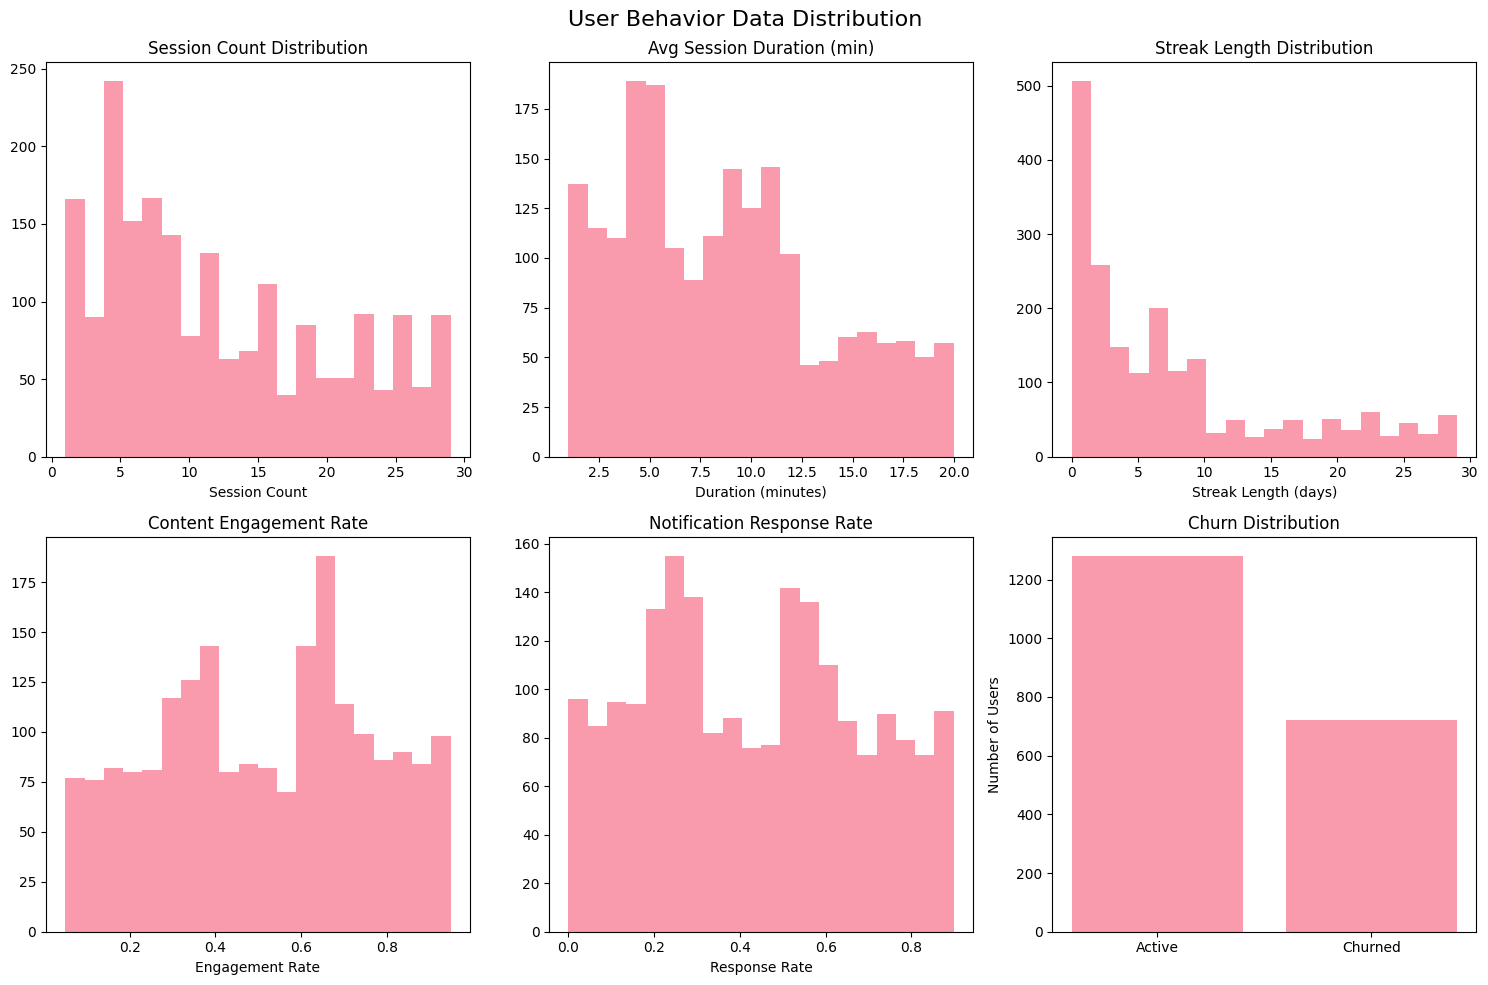

In [7]:
# Visualize the data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('User Behavior Data Distribution', fontsize=16)

# Session count distribution
axes[0,0].hist(df['session_count'], bins=20, alpha=0.7)
axes[0,0].set_title('Session Count Distribution')
axes[0,0].set_xlabel('Session Count')

# Average session duration
axes[0,1].hist(df['avg_session_duration'], bins=20, alpha=0.7)
axes[0,1].set_title('Avg Session Duration (min)')
axes[0,1].set_xlabel('Duration (minutes)')

# Streak length
axes[0,2].hist(df['streak_length'], bins=20, alpha=0.7)
axes[0,2].set_title('Streak Length Distribution')
axes[0,2].set_xlabel('Streak Length (days)')

# Content engagement rate
axes[1,0].hist(df['content_engagement_rate'], bins=20, alpha=0.7)
axes[1,0].set_title('Content Engagement Rate')
axes[1,0].set_xlabel('Engagement Rate')

# Notification response rate
axes[1,1].hist(df['notification_response_rate'], bins=20, alpha=0.7)
axes[1,1].set_title('Notification Response Rate')
axes[1,1].set_xlabel('Response Rate')

# Churn distribution
churn_counts = df['churn'].value_counts()
axes[1,2].bar(['Active', 'Churned'], churn_counts, alpha=0.7)
axes[1,2].set_title('Churn Distribution')
axes[1,2].set_ylabel('Number of Users')

plt.tight_layout()
plt.show()

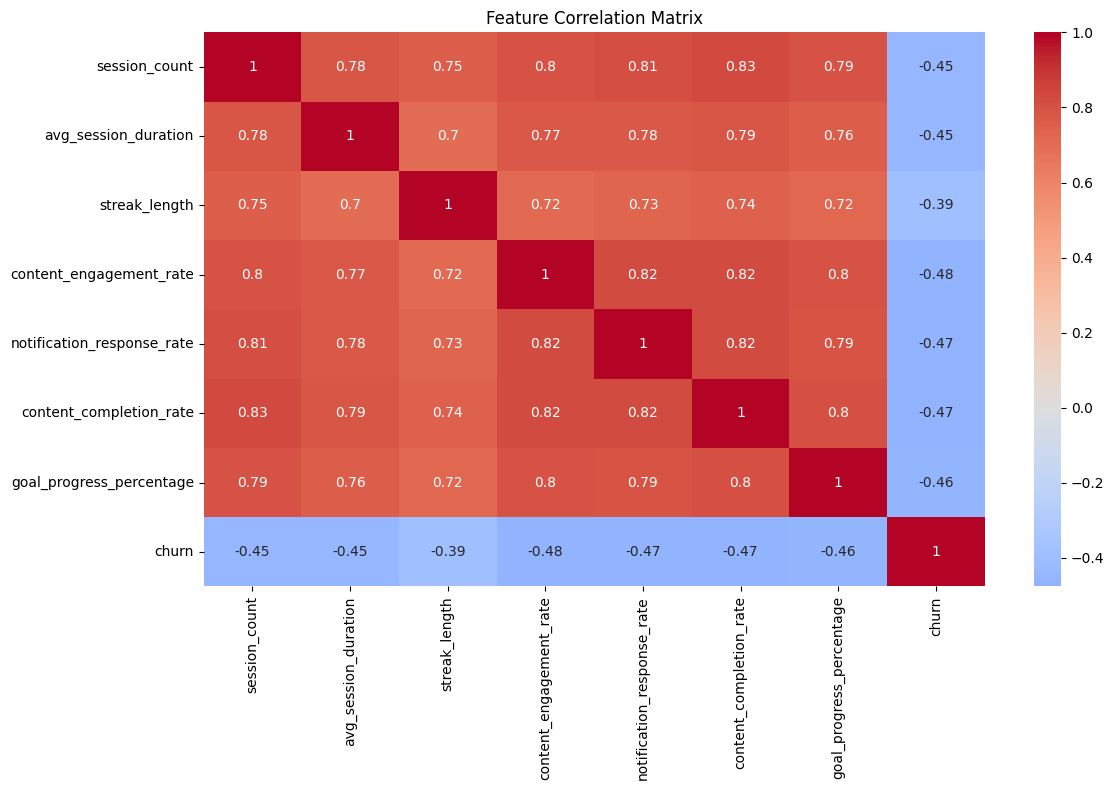

<Figure size 1000x600 with 0 Axes>

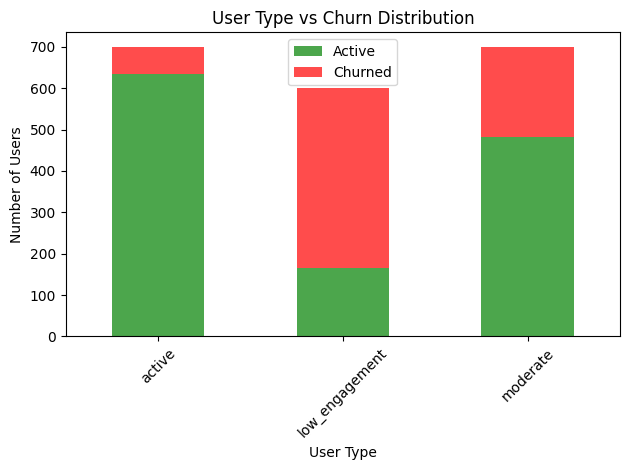

In [8]:
# Additional visualizations - Feature correlations
plt.figure(figsize=(12, 8))
correlation_features = [
    'session_count', 'avg_session_duration', 'streak_length',
    'content_engagement_rate', 'notification_response_rate',
    'content_completion_rate', 'goal_progress_percentage', 'churn'
]
correlation_matrix = df[correlation_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# User type vs churn visualization
plt.figure(figsize=(10, 6))
user_type_churn = df.groupby(['user_type', 'churn']).size().unstack()
user_type_churn.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7)
plt.title('User Type vs Churn Distribution')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.legend(['Active', 'Churned'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Save the dataset
data_dir = "../data"
os.makedirs(data_dir, exist_ok=True)

dataset_path = os.path.join(data_dir, "training_dataset.csv")
df.to_csv(dataset_path, index=False)

print(f"✅ Dataset saved to {dataset_path}")
print(f"\n📊 Dataset Summary:")
print(f"   - Total users: {len(df):,}")
print(f"   - Features: {df.shape[1]}")
print(f"   - Active users: {len(df[df['churn']==0]):,} ({(df['churn']==0).mean():.1%})")
print(f"   - Churned users: {len(df[df['churn']==1]):,} ({(df['churn']==1).mean():.1%})")
print(f"\n🎯 User Types:")
for user_type in df['user_type'].unique():
    count = len(df[df['user_type']==user_type])
    churn_rate = df[df['user_type']==user_type]['churn'].mean()
    print(f"   - {user_type.title()}: {count:,} users (churn rate: {churn_rate:.1%})")

print(f"\n✨ Ready for model training in separate notebooks!")

✅ Dataset saved to ../data/training_dataset.csv

📊 Dataset Summary:
   - Total users: 2,000
   - Features: 14
   - Active users: 1,280 (64.0%)
   - Churned users: 720 (36.0%)

🎯 User Types:
   - Active: 700 users (churn rate: 9.4%)
   - Moderate: 700 users (churn rate: 31.3%)
   - Low_Engagement: 600 users (churn rate: 72.5%)

✨ Ready for model training in separate notebooks!
